In [1]:
import numpy as np
import pandas as pd

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

### lets get data

In [2]:
column_names = ['user_id', "item_id", "rating", "timestamp"]
df = pd.read_csv("udata.csv",  names = column_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


#### Now let's get the movie titles:

In [4]:
movie_title = pd.read_csv("mov.csv", encoding='latin-1')
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


merging two dataframe having common column as title

In [5]:
df = pd.merge(df, movie_title, on = "item_id")

In [6]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


#### let's make some visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline

here we are arranging movies in order of average rating (sum(rating)/no of users).
its not fairway because there may be chances of less number of users give high rating to one movie,
so particular movie with most views is skipped

In [9]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Entertaining Angels: The Dorothy Day Story (1996)    5.0
They Made Me a Criminal (1939)                       5.0
Star Kid (1997)                                      5.0
Santa with Muscles (1996)                            5.0
Great Day in Harlem, A (1994)                        5.0
Name: rating, dtype: float64

here we are arranging movies in order of most views 

In [10]:
df.groupby("title")['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [11]:
rating = pd.DataFrame(df.groupby('title')['rating'].mean())
rating.head()

,rating
title,
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
2 Days in the Valley (1996),3.225806


Let's add number of rating column to dataframe

In [12]:
rating['number of rating'] = pd.DataFrame(df.groupby('title')['rating'].count())
rating.head()

,rating,number of rating
title,,
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93


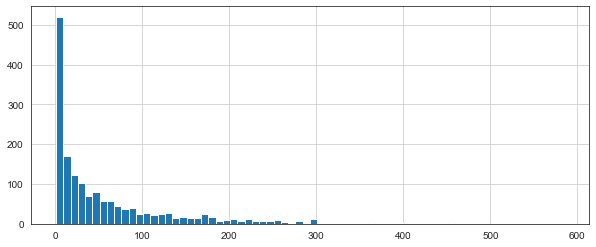

In [13]:
plt.figure(figsize = (10,4))
rating['number of rating'].hist(bins = 70)

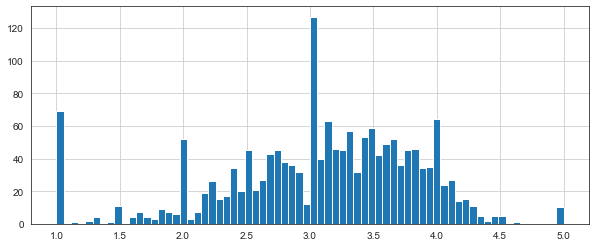

In [14]:
plt.figure(figsize = (10,4))
rating['rating'].hist(bins = 70)

so here we got kind of bell shaped histogram with some outliers which is very helpful for us

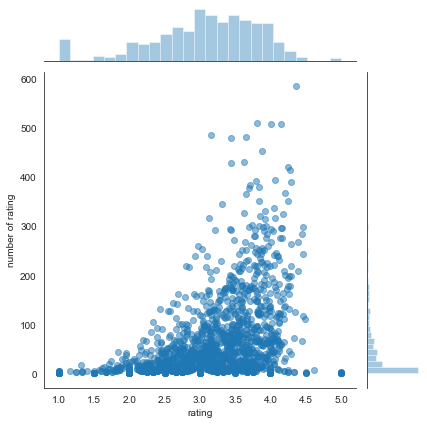

In [15]:
sns.jointplot(x = 'rating', y = 'number of rating', data = rating, alpha = 0.5)

Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [16]:
moviemat = df.pivot_table( index = "user_id", columns = 'title', values = 'rating')
moviemat.head()

title,1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most rated movie:

In [17]:
rating.sort_values('number of rating', ascending = False).head(10)

,rating,number of rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.

In [18]:
rating.head()

,rating,number of rating
title,,
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93


Now let's grab the user ratings for those two movies:

In [20]:
starwar_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwar_user_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

We can then use corrwith() method to get correlations between two pandas series:

In [24]:
similar_to_starwar = moviemat.corrwith(starwar_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

In [26]:
corr_starwar = pd.DataFrame(similar_to_starwar, columns = ['correlation'])
corr_starwar.head()

,correlation
title,
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).

In [50]:
corr_starwar.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Man of the Year (1995),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Commandments (1997),1.0
Cosi (1996),1.0
Hollow Reed (1996),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [51]:
corr_starwar = corr_starwar.join(rating['number of rating'])
corr_starwar.head()

,correlation,number of rating
title,,
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93


Now sort the values and notice how the titles make a lot more sense:

In [52]:
corr_starwar[corr_starwar['number of rating'] > 100].sort_values('correlation', ascending = False).head()

,correlation,number of rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


so here we got a movies that we can be recommanded similar to starwar

Let's done same for liarliar_user_ratings

In [61]:
corr_liar = pd.DataFrame(similar_to_liarliar, columns = ['correlation'])
corr_liar.dropna(inplace =True)
corr_liar = corr_liar.join(rating['number of rating'])
corr_liar[corr_liar['number of rating']> 100].sort_values('correlation', ascending = False).head()

,correlation,number of rating
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


### and here we done !!